In [1]:
filename = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/expression_associations.f_cells.tsv'

In [2]:
myfile = read.csv(filename, sep = "\t")
head(myfile)

ensembl_gene_id,hgnc_symbol,coef,pval,pval_adj
ENSG00000197461,PDGFA,-0.5542108,1.376734e-14,1.855149e-10
ENSG00000152977,ZIC1,-0.5391174,9.515179e-14,6.410852e-10
ENSG00000164651,SP8,-0.5286450,3.441941e-13,1.546005e-09
ENSG00000171794,UTF1,-0.4988503,1.058444e-11,3.412170e-08
ENSG00000152779,SLC16A12,-0.4972099,1.266111e-11,3.412170e-08
ENSG00000048540,LMO3,-0.4912546,2.407010e-11,5.405742e-08


In [3]:
nrow(myfile[myfile$pval_adj <0.05 & myfile$coef>0,])
nrow(myfile[myfile$pval_adj <0.05 & myfile$coef<0,])

[1] 983

[1] 1062

In [5]:
DE_pos = myfile[myfile$pval_adj <0.1 & myfile$coef>0,]
DE_neg = myfile[myfile$pval_adj <0.1 & myfile$coef<0,]

In [6]:
nrow(DE_pos)
nrow(DE_neg)

[1] 1308

[1] 1564

In [41]:
myfile = myfile[myfile$pval_adj <0.1,]

In [61]:
other_filename = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/jo_powell_data/DEseq_cluster1_vs_cluster234.txt'
other_filename = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/jo_powell_data/DEseq_cluster2_vs_cluster134.txt'
# other_filename = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/jo_powell_data/DEseq_cluster3_vs_cluster124.txt'
# other_filename = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/jo_powell_data/DEseq_cluster4_vs_cluster123.txt'

In [62]:
myfile1 = read.csv(other_filename, sep = "\t")
head(myfile1)

id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
AL627309.1_ENSG00000237683,0.059336603,0.067552507,0.051818340,0.7670824,-0.3825465,0.05522152,0.2402369
RP11-206L10.9_ENSG00000237491,0.002767522,0.003823029,0.001801642,0.4712602,-1.0854042,0.48225736,1.0000000
LINC00115_ENSG00000225880,0.020555679,0.022517262,0.018760661,0.8331679,-0.2633208,0.61138436,1.0000000
RP11-54O7.1_ENSG00000230699,0.004162721,0.004825277,0.003556426,0.7370408,-0.4401836,0.33465944,0.8666919
RP11-54O7.3_ENSG00000223764,0.001827732,0.001437878,0.002184481,1.5192391,0.6033489,1.00000000,1.0000000
SAMD11_ENSG00000187634,0.049817405,0.052653577,0.047222061,0.8968443,-0.1570705,0.17281430,0.5677320


In [63]:
myfile1$ensembl_gene_id <- gsub(".*_","",myfile1$id)
head(myfile1)

id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj,ensembl_gene_id
AL627309.1_ENSG00000237683,0.059336603,0.067552507,0.051818340,0.7670824,-0.3825465,0.05522152,0.2402369,ENSG00000237683
RP11-206L10.9_ENSG00000237491,0.002767522,0.003823029,0.001801642,0.4712602,-1.0854042,0.48225736,1.0000000,ENSG00000237491
LINC00115_ENSG00000225880,0.020555679,0.022517262,0.018760661,0.8331679,-0.2633208,0.61138436,1.0000000,ENSG00000225880
RP11-54O7.1_ENSG00000230699,0.004162721,0.004825277,0.003556426,0.7370408,-0.4401836,0.33465944,0.8666919,ENSG00000230699
RP11-54O7.3_ENSG00000223764,0.001827732,0.001437878,0.002184481,1.5192391,0.6033489,1.00000000,1.0000000,ENSG00000223764
SAMD11_ENSG00000187634,0.049817405,0.052653577,0.047222061,0.8968443,-0.1570705,0.17281430,0.5677320,ENSG00000187634


In [64]:
myfile = myfile[myfile$pval_adj <0.1,]
genes = myfile$ensembl_gene_id

In [65]:
myfile1 = myfile1[myfile1$padj <0.1,]

In [66]:
genes1 = myfile1$ensembl_gene_id

In [67]:
length(genes)
length(genes1)
length(genes[genes %in% genes1])
length(genes1[genes1 %in% genes])

[1] 2872

[1] 3024

[1] 504

[1] 504

In [68]:
our = length(genes)
jos = length(genes1)
both = length(genes[genes %in% genes1])

In [69]:
our-both
jos-both
both

[1] 2368

[1] 2520

[1] 504

In [70]:
# library(eulerr)
# ### cluster 1
# fit <- euler(c("our" = our-both , "jos" = jos-both, "our&jos" = both)) ## DE genes (FDR 10%)
# plot(fit, 
#      labels = list(col = c("gray30"))

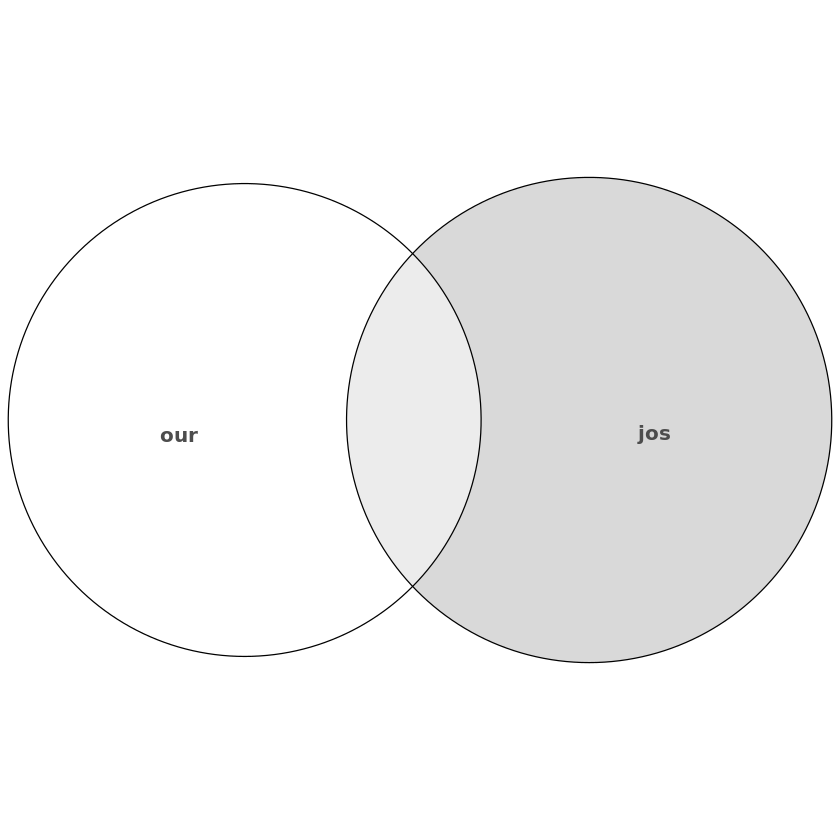

In [72]:
### cluster 2
fit <- euler(c("our" = our-both , "jos" = jos-both, "our&jos" = both)) ## DE genes (FDR 10%)
plot(fit, 
     labels = list(col = c("gray30")))

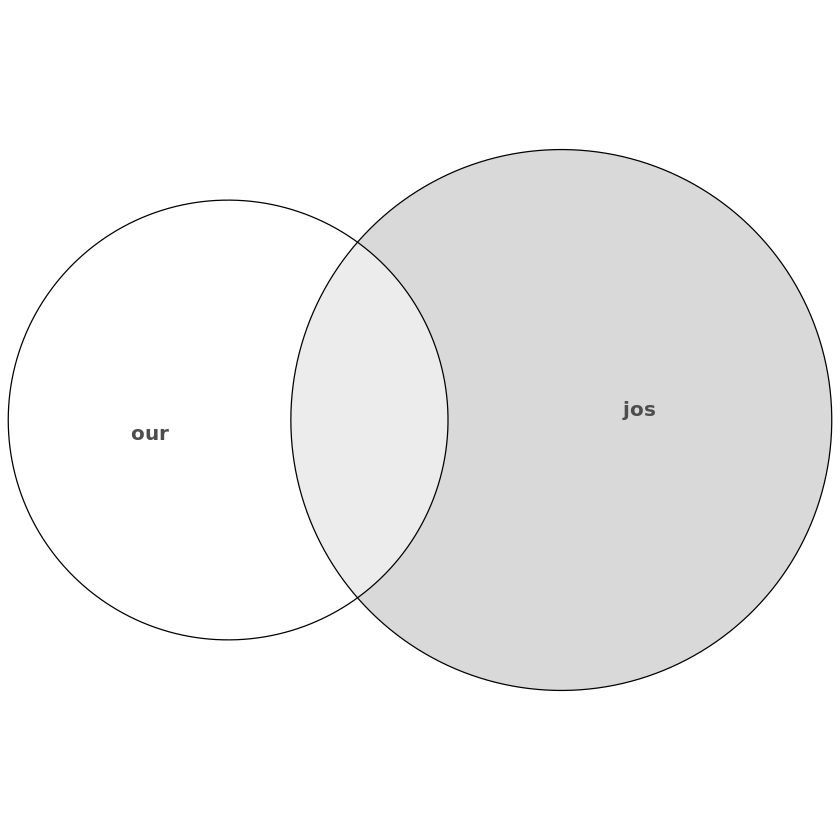

In [37]:
### cluster 3
fit <- euler(c("our" = our-both , "jos" = jos-both, "our&jos" = both)) ## DE genes (FDR 10%)
plot(fit, 
     labels = list(col = c("gray30")))

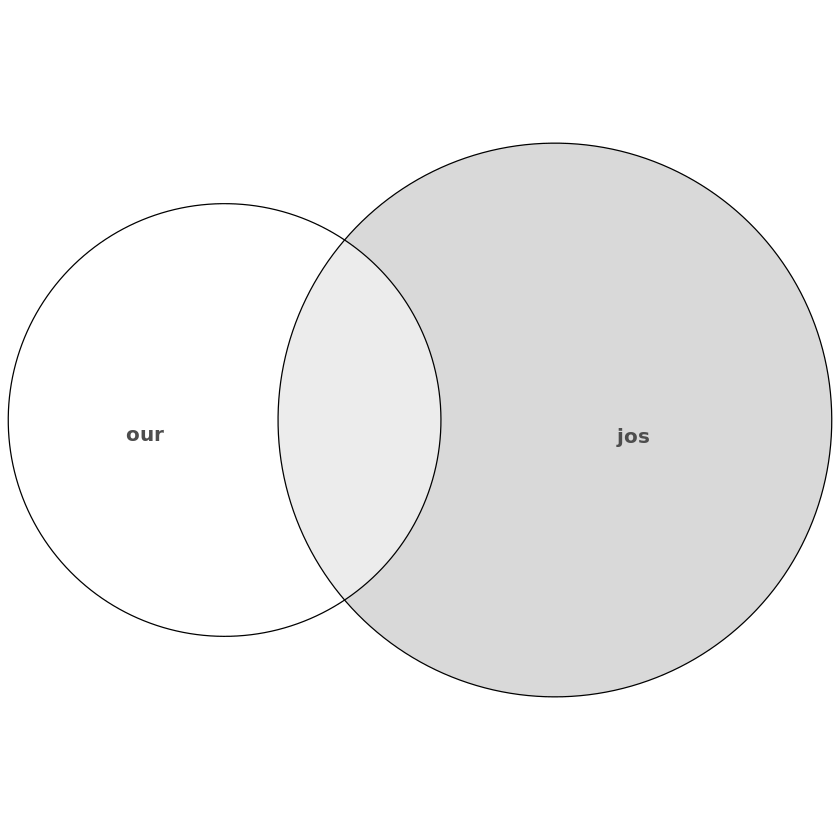

In [24]:
### cluster 4
fit <- euler(c("our" = our-both , "jos" = jos-both, "our&jos" = both)) ## DE genes (FDR 10%)
plot(fit, 
     labels = list(col = c("gray30")))

In [54]:
DE_pos1 = myfile1[myfile1$padj <0.1 & myfile1$log2FoldChange>0,]
DE_neg1 = myfile1[myfile1$padj <0.1 & myfile1$log2FoldChange<0,]

In [55]:
genes0 = DE_pos$ensembl_gene_id
genes1 = DE_neg$ensembl_gene_id

genes2 = DE_pos1$ensembl_gene_id
genes3 = DE_neg1$ensembl_gene_id

In [56]:
length(genes0)
length(genes1)
length(genes2)
length(genes3)
length(genes0[genes0 %in% genes2])
length(genes1[genes1 %in% genes3])

[1] 1308

[1] 1564

[1] 3802

[1] 901

[1] 324

[1] 75